<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-engineering/blob/master/Unit%202%20Review%20of%20Rock%20and%20Fluid%20Properties/notebook/2_practices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unit 2. Review of Rock and Fluid Properties (Practice Problems)**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!git clone https://github.com/yohanesnuwara/reservoir-engineering

Cloning into 'reservoir-engineering'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 77 (delta 31), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (77/77), done.


# Example 2.2 Relative Permeability Calculations from Steady-State Tests

In [0]:
flowrate = pd.read_csv('/content/reservoir-engineering/Unit 2 Review of Rock and Fluid Properties/data/Table 2.2-Flow Rates for Example 2.2.csv')
flowrate

,Sw,qo,qw
0,0.00,0.0600,0.000
1,0.20,0.0420,0.000
2,0.30,0.0300,0.010
3,0.40,0.0200,0.020
4,0.50,0.0130,0.035
5,0.60,0.0075,0.051
6,0.70,0.0040,0.068
7,0.80,0.0010,0.085
8,0.85,0.0000,0.096
9,1.00,0.0000,0.250


Text(0.5, 1.0, 'Flow Rates')

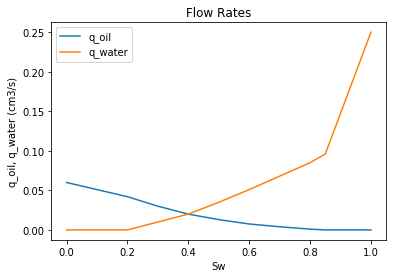

In [0]:
# plot data
p1 = plt.plot(flowrate.Sw, flowrate.qo)
p2 = plt.plot(flowrate.Sw, flowrate.qw)
plt.xlabel("Sw"); plt.ylabel("q_oil, q_water (cm3/s)")
plt.legend((p1[0], p2[0]), ('q_oil', 'q_water'))
plt.title("Flow Rates")

Text(0.5, 1.0, 'Relative Permeabilities')

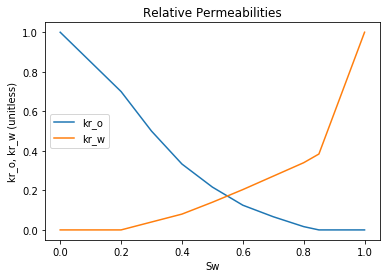

In [0]:
"Question 1. calculate relative permeabilities of oil and water"
kr_o = flowrate.qo / flowrate.qo[0] #qo per q0 at Sw=0
kr_w = flowrate.qw / flowrate.qw[9] #qw per qw at Sw=1

# plot result
p1 = plt.plot(flowrate.Sw, kr_o)
p2 = plt.plot(flowrate.Sw, kr_w)
plt.xlabel("Sw"); plt.ylabel("kr_o, kr_w (unitless)")
plt.legend((p1[0], p2[0]), ('kr_o', 'kr_w'))
plt.title("Relative Permeabilities")

Text(0.5, 1.0, 'Phase Permeabilities')

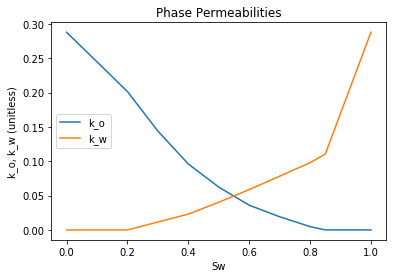

In [0]:
"Question 2. calculate the phase permeabilities of oil and water"

#known
mu_oil = 5 #oil viscosity, cP
mu_water = 1.2 #water viscosity, cP
core_length = 12 #cm
dP = -2.5 #negative because of pressure drop, atm
core_area = 5 #cm2

# so in this case, Darcy units are used (refer to Table 2.1), the unit of k will be in Darcy 
# use q = -k*A/mu*dp/dx, negative sign because pressure drop

k_o = -(flowrate.qo * mu_oil / core_area) / (dP / core_length)
k_w = -(flowrate.qw * mu_water / core_area) / (dP / core_length)

# plot result
p1 = plt.plot(flowrate.Sw, k_o)
p2 = plt.plot(flowrate.Sw, k_w)
plt.xlabel("Sw"); plt.ylabel("k_o, k_w (unitless)")
plt.legend((p1[0], p2[0]), ('k_o', 'k_w'))
plt.title("Phase Permeabilities")

# Example 2.3 Calculation of Leverett J Function (Capillary Pressure)

In [0]:
"Question. calculate Leverett J function for different sets of core"

# known
sigma = 72 # interfacial tension, in dyne/cm
theta = 45 # angle of wettability

# data: four sets of core from same reservoir, each has k and porosity (Table 2.5)
# capillary pressure in psi
capilar = pd.read_csv('/content/reservoir-engineering/Unit 2 Review of Rock and Fluid Properties/data/Table 2.3-Capillary Pressure Sets for Example 2.3.csv')
capilar.head()

# Pc_1: capillary pressure of core 1, at 1 md and poro 0.08
# Pc_2: capillary pressure of core 2, at 15 md and poro 0.11
# Pc_3: capillary pressure of core 3, at 100 md and poro 0.15
# Pc_4: capillary pressure of core 4, at 500 md and poro 0.22

,sw,Pc_1,Pc_2,Pc_3,Pc_4
0,15.0,93.59,28.34,12.82,6.94
1,16.0,66.48,20.13,9.10,4.93
2,17.0,46.54,14.09,6.37,3.45
3,18.0,39.89,12.08,5.46,2.96
4,19.0,33.24,10.06,4.55,2.47


In [0]:
"units are not coherent, convert units to psi, cm2"

sigma = 72 * (1/68947.57) # from dyne/cm convert to psi/cm, 1 psi = 68947.57 dyne/cm2

# Pc in data is already in psi, correct.

# permeability must be in unit cm2 to match with sigma dyne/cm
k_1 = (1 / 1000) * (0.98689233 * 1E-08) # permeability of core 1, 1 darcy = 100 md = 0.98689233 micro.m2 = ... * 1E-08 cm2
k_2 = (15 / 1000) * (0.98689233 * 1E-08)
k_3 = (100 / 1000) * (0.98689233 * 1E-08)
k_4 = (500 / 1000) * (0.98689233 * 1E-08)

poro_1 = 0.08 # porosity of core 1
poro_2 = 0.11
poro_3 = 0.15
poro_4 = 0.22

In [0]:
J_1 = (capilar.Pc_1 / (sigma * np.cos(np.deg2rad(theta)))) * np.sqrt(k_1 / poro_1)
J_2 = (capilar.Pc_2 / (sigma * np.cos(np.deg2rad(theta)))) * np.sqrt(k_2 / poro_2)
J_3 = (capilar.Pc_3 / (sigma * np.cos(np.deg2rad(theta)))) * np.sqrt(k_3 / poro_3)
J_4 = (capilar.Pc_4 / (sigma * np.cos(np.deg2rad(theta)))) * np.sqrt(k_4 / poro_4)
J = pd.DataFrame({"Sw":capilar.sw, "Leverett_1":J_1, "Leverett_2":J_2, "Leverett_3":J_3, "Leverett_4":J_4})
J.head()

,Sw,Leverett_1,Leverett_2,Leverett_3,Leverett_4
0,15.0,1.407735,1.407944,1.408247,1.407568
1,16.0,0.999959,1.000068,0.999614,0.999901
2,17.0,0.700032,0.699998,0.699729,0.699728
3,18.0,0.600006,0.600140,0.599768,0.600346
4,19.0,0.499980,0.499785,0.499807,0.500965


Text(0.5, 1.0, 'Leverett J-Function')

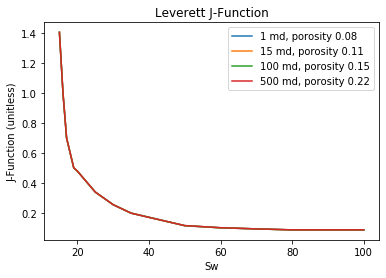

In [0]:
# plot Leverett function result
p1 = plt.plot(J[['Sw']], J[['Leverett_1']])
p2 = plt.plot(J[['Sw']], J[['Leverett_2']])
p3 = plt.plot(J[['Sw']], J[['Leverett_3']])
p4 = plt.plot(J[['Sw']], J[['Leverett_4']])
plt.xlabel("Sw"); plt.ylabel("J-Function (unitless)")
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('1 md, porosity 0.08', '15 md, porosity 0.11', '100 md, porosity 0.15', '500 md, porosity 0.22'))
plt.title("Leverett J-Function")

# Example 2.4 Calculation of Z Factor for Sour Gas

The resulted T_pr and P_pr (pseudoreduced) will be traced using Standing-Katz graph to find the z factor

![Standing-Katz EOS](https://petrowiki.org/images/thumb/7/76/Vol1_Page_225_Image_0001.png/708px-Vol1_Page_225_Image_0001.png)

In [68]:
"Question. calculate z factor for the sour gas"
# known
pressure = 2010 # in psia
temp = 75 # in deg F
sg = 0.7 # specific gravity
x_h2s = 0.07 # mole fraction
x_co2 = 0.1

temp = temp + 459.67 # convert to Rankine

# calculate pseudocritical properties (Sutton, valid for 0.57<sg<1.68)
P_pc = 756.8 - (131.07 * sg) - (3.6 * sg**2)
T_pc = 169.2 + (349.50 * sg) - (74 * sg**2) # in Rankine

# calculate adjustment to pseudocritical properties for sour gas (Wiechert-Aziz, valid for x_co2<0.544 and x_h2s<0.738)
e = (120 * (((x_h2s + x_co2)**0.9) - ((x_h2s + x_co2)**1.6))) + (15 * (x_h2s**0.5 - x_h2s**4))
T_pc_corr = T_pc - e # corrected T_pc
P_pc_corr = (P_pc * T_pc_corr) / (T_pc - x_h2s * e * (1-x_h2s))

# calculate pseudoreduced properties
P_pr = pressure / P_pc_corr
T_pr = temp / T_pc_corr

print("Gas pseudocritical temperature: ",T_pc_corr, "deg Rankine")
print("Gas pseudocritical pressure: ",P_pc_corr, "psia")
print("Gas pseudoreduced temperature: ",T_pr)
print("Gas pseudoreduced pressure: ",P_pr)

Gas pseudocritical temperature:  356.31219397078127 deg Rankine
Gas pseudocritical pressure:  628.2143047814683 psia
Gas pseudoreduced temperature:  1.5005661019949397
Gas pseudoreduced pressure:  3.1995450990234966


In [69]:
# find z factor from tracing Standing-Katz graph
z = 0.772 # according to book
print("Gas compressibility factor from Standing graph: ",z)

Gas compressibility factor from Standing graph:  0.772


# Example 2.5 Properties of Natural Gas

<div>
<img src="https://user-images.githubusercontent.com/51282928/74208479-42ff2e00-4cb6-11ea-8fba-b9e15e1b53b3.PNG" width="400"/>
</div>

In [0]:
"Question 1. calculate density"

# known: similar gas (P,T,X) like Example 2.4, P in psia, T in Rankine

R = 10.732 # gas constant in (ft3*psi)/(lb-mol*R), see gas constants above
rhogas = (28.97 * sg * pressure) / (z * R * temp)
print("Gas density: ",rhogas, "lbm/ft3")

Gas density:  9.201503836047605 lbm/ft3


In [0]:
"Question 2. calculate gas volume factor (FVF or Bg)"

Bg = 0.0282793 * z * temp / pressure

print("Gas volume factor: ",Bg, "res ft3/scf")

Gas volume factor:  0.005807319428622887 res ft3/scf


**Fig 2.12 Viscosity of natural gas at 1 atm (Carr et al)**

<div>
<img src="https://petrowiki.org/images/thumb/8/86/Vol1_Page_238_Image_0001.png/1200px-Vol1_Page_238_Image_0001.png" width="500"/>
</div>

**Fig 2.14 Viscosity ratio vs pseudoreduced temperature (Carr et al)**

<div>
<img src="https://petrowiki.org/images/thumb/f/fa/Vol1_Page_240_Image_0001.png/516px-Vol1_Page_240_Image_0001.png" width="300"/>
</div>

In [0]:
"Question 3. calculate viscosity "

# according to book: use Carr et al
Mg = 28.97 * sg
# viscosity is traced using Fig 2.12 graph, also the corrections of h2s and co2
mu_ga = 0.0102 # in centipoise
mu_h2s_corr = 0.0002 # h2s corrector
mu_co2_corr = 0.0005 
mu_ga_corr = mu_ga + mu_h2s_corr + mu_co2_corr

mu_ratio = 1.55 # viscosity ratio traced from Fig 2.14 graph
mu_carr = mu_ga_corr * mu_ratio

# alternative to book: use Lee et al
K = ((0.00094 + 2E-06)*(temp**1.5)) / (209 + 19*Mg + temp)
rhogas_lee = rhogas * 0.0160185 # lbm/ft3 converted to gas density unit of Lee et al (g/cm3)
x = 3.5 + (986 / temp) + (0.01 * Mg)
y = 2.4 - 0.2*x

mu_lee = K * np.exp(x * (rhogas_lee**y))

print("Gas viscosity using Carr et al: ",mu_carr,"cP")
print("Gas viscosity using Lee et al: ",mu_lee,"cP")

Gas viscosity using Carr et al:  0.016895000000000004 cP
Gas viscosity using Lee et al:  0.01648326802386323 cP


**Fig 2.10 Pseudoreduced compressibility chart (c_pr*T_pr) (Trube and Mattar)**

<div>
<img src="https://petrowiki.org/images/thumb/2/25/Vol1_Page_236_Image_0001.png/636px-Vol1_Page_236_Image_0001.png" width="300"/>
</div>

In [0]:
"Question 4. calculate isothermal compressibility"

# find pseudoreduced (c_pr*T_pr) from Fig 2.10 graph (Trube and Mattar), T_pr, P_pr has been solved previously (Example 2.4)

trube_factor = 0.5 # is c_pr*T_pr
c_pr_graphical = trube_factor / T_pr
cgas_graphical = c_pr_graphical / P_pc_corr # pseudocritical pressure (P_pc_corr) has been solved previously (Example 2.4)

# alternative: use Mattar et al analytical solution
rho_pr = (0.27 * P_pr) / (z * T_pr)

a1 = 0.3265; a2 = -1.0700; a3 = -0.5339; a4 = 0.01569; a5 = -0.05165; a6 = 0.5475
a7 = -0.7361; a8 = 0.1844; a9 = 0.1056; a10 = 0.6134; a11 = 0.7210

do = ((a1 + (a2/T_pr) + (a3/T_pr**3) +(a4/T_pr**4) + (a5/T_pr**5)) * rho_pr) + \
     (2 * ((a6 + (a7/T_pr) + (a8/T_pr**2))) * rho_pr**2) - \
     (5 * a9 * (((a7/T_pr) + (a8/T_pr**2))) * rho_pr**4) + (1 + (a11 * rho_pr**2) - (a11 * rho_pr**2)**2) \
     * ((2 * a10 * rho_pr / T_pr**3)*np.exp(-a11 * rho_pr**2))

c_pr_analytical = (1 / P_pr) - ((0.27 / (z**2 * T_pr)) * (do / (1 + ((rho_pr / z) * do))))
cgas_analytical = c_pr_analytical / P_pc_corr

print("Gas isothermal compressibility at 1 atm using Trube and Mattar: ",cgas_graphical,"psi^-1")
print("Gas isothermal compressibility at 1 atm using Mattar analytical: ",cgas_analytical,"psi^-1")

Gas isothermal compressibility at 1 atm using Trube and Mattar:  0.0005304043187384391 psi^-1
Gas isothermal compressibility at 1 atm using Mattar analytical:  0.00048026851516057723 psi^-1


# Example 2.6 Calculation of Bubblepoint Pressure of Oil

In [3]:
# Question. calculate bubblepoint pressure using Standing and Vasquez-Beggs

#known
Rsb = 500 # gas-oil ratio AT and ABOVE BUBBLEPOINT pressure, in scf/STB
temp2 = 220 # reservoir temperature, in deg F
sg2 = 0.8
api = 30 # specific gravity of oil, deg API

# using Standing
x_gas = (0.00091*temp2) - (0.0125*api) # mole fraction of gas
P_bubble_standing = 18 * ((Rsb / sg2)**0.83) * (10**x_gas)

# using Vazquez-Beggs (more accurate than Standing)

# c1, c2, c3 coefficient from Vazquez-Beggs
if api <=30:
  c1 = 0.0362
  c2 = 1.0937
  c3 = 25.7240
if api > 30:
  c1 = 0.0178
  c2 = 1.187
  c3 = 23.9310

P_bubble_vaz = (Rsb / (c1 * sg2 * np.exp((c3 * api)/(temp2 + 459.67))))**(1 / c2) # convert temp to Rankine

print("Bubblepoint pressure of oil using Standing: ",P_bubble_standing,"psi")
print("Bubblepoint pressure of oil using Vazquez-Beggs (more accurate): ",P_bubble_vaz,"psi")

Bubblepoint pressure of oil using Standing:  2517.983729536601 psi
Bubblepoint pressure of oil using Vazquez-Beggs (more accurate):  2650.3067919543523 psi


# Example 2.7 Calculation of Oil Properties

In [38]:
"Question 1. calculate oil isothermal compressibility"

from math import e

# known: properties of oil are like Example 2.6 with temperature = temp2, sg2, api, Rsb

pressure2 = np.arange(100, 5100, 100)
# pressure2 = 3000
P_bubble = P_bubble_vaz # the oil has bubblepoint pressure which has been solved previously (Example 2.6)

# oil isothermal compressibility

coil_array = []

for i in range(len(pressure2)):
  if pressure2[i] < P_bubble:
    # use McCain
    ln_coil = -7.573 - (1.45 * np.log(pressure2[i])) - (0.383 * np.log(P_bubble)) + (1.402 * np.log(temp2)) + (0.256 * np.log(api)) + (0.449 * np.log(Rsb))  
    coil = np.exp(ln_coil)
  if pressure2[i] >= P_bubble:
    # use Vazquez-Beggs
    coil = ((5 * Rsb) + (17.2 * temp2) - (1180 * sg2) + (12.61 * api) - 1433) / (1E+05 * pressure2[i])
  coil_array.append(float(coil))

coil_df = pd.DataFrame({"pressure(psia)": pressure2, "compressibility(psi^-1)": coil_array})
pd.options.display.float_format = '{:.2E}'.format # convert into exponential form
coil_df.head()

,pressure(psia),compressibility(psi^-1)
0,100,2.37E-03
1,200,8.66E-04
2,300,4.81E-04
3,400,3.17E-04
4,500,2.29E-04


In [39]:
"Question 2. calculate gas-oil ratio (Rs)"

# gas-oil ratio

Rs_array = []

for i in range(len(pressure2)):
  if pressure2[i] < P_bubble:
    Rsc = (pressure2[i]**c2) * c1 * sg2 * np.exp((c3 * api) / (temp2 + 459.67)) # gas-oil ratio at any pressure BELOW BUBBLEPOINT using Vazquez-Beggs
    Rs = Rsc
  if pressure2[i] >= P_bubble:
    Rs = Rsb
  Rs_array.append(float(Rs))

Rs_df = pd.DataFrame({"pressure(psia)": pressure2, "Gas-oil ratio(scf/STB)": Rs_array})
props = pd.merge(coil_df, Rs_df, on='pressure(psia)') # merge the result with previous dataframe
props.head()

,pressure(psia),compressibility(psi^-1),Gas-oil ratio(scf/STB)
0,100,2.37E-03,1.39E+01
1,200,8.66E-04,2.96E+01
2,300,4.81E-04,4.61E+01
3,400,3.17E-04,6.32E+01
4,500,2.29E-04,8.07E+01


In [40]:
"Question 3. calculate oil formation volume factor (FVF)"

# FVF of oil at bubblepoint pressure using Levitan-Murtha
so = 141.5 / (api + 131.5)
Bo_bubble = 1 + ((0.0005 * Rsb) * ((sg2 / so)**0.25)) + ((0.0004*(temp2- 60)) / (so * sg2)) # temp in def F

Bo_array = []

for i in range(len(pressure2)):
  if pressure2[i] < P_bubble: # use Vazquez-Beggs
    if api <= 30:
      # use Vazquez-Beggs 
      c4 = 4.677E-4
      c5 = 1.751E-5
      c6 = -1.811E-8
    if api <= 30:
      c4 = 4.670E-4
      c5 = 1.100E-5
      c6 = 1.337E-9
    Rsc = (pressure2[i]**c2) * c1 * sg2 * np.exp((c3 * api) / (temp2 + 459.67))
    Bo = 1 + (c4 * Rsc) + (c5 * (temp2 - 60) * (api / sg2)) + (c6 * Rsc *(temp2 - 60) * (api / sg2)) # temp in deg F
  if pressure2[i] == P_bubble:
    # use Levitan-Murtha
    Bo = Bo_bubble
  if pressure2[i] > P_bubble:
    # use Levitan-Murtha
    coil = ((5 * Rsb) + (17.2 * temp2) - (1180 * sg2) + (12.61 * api) - 1433) / (1E+05 * pressure2[i])
    Bo = Bo_bubble * np.exp(coil * (P_bubble - pressure2[i]))
  Bo_array.append(float(Bo))

Bo_df = pd.DataFrame({"pressure(psia)": pressure2, "formation-volume-factor(RB/STB)": Bo_array})
props = pd.merge(Bo_df, props, on='pressure(psia)') # merge the result with previous dataframe
props.head()

,pressure(psia),formation-volume-factor(RB/STB),compressibility(psi^-1),Gas-oil ratio(scf/STB)
0,100,1.07E+00,2.37E-03,1.39E+01
1,200,1.08E+00,8.66E-04,2.96E+01
2,300,1.09E+00,4.81E-04,4.61E+01
3,400,1.10E+00,3.17E-04,6.32E+01
4,500,1.10E+00,2.29E-04,8.07E+01


In [41]:
"Question 4. calculate oil viscosity"

mu_oil_array = []

for i in range(len(pressure2)):
  if pressure2[i] <= P_bubble:
    # use Beggs and Robinson
    # valid for: 0 < pressure < 5250 psig, 70 < temp < 295 F, 20 < Rs < 2070 scf/STB, 16 < api < 58 API 
    x = (temp2**(-1.163)) * np.exp(6.9824 - (0.04658 * api))
    mu_dead_oil = 10**x - 1
    Rs = (pressure2[i]**c2) * c1 * sg2 * np.exp((c3 * api) / (temp2 + 459.67)) # gas-oil ratio at any pressure BELOW BUBBLEPOINT using Vazquez-Beggs
    a = 10.715 * ((Rs + 100)**(-0.515))
    b = 5.44 * ((Rs + 150)**(-0.338))
    mu_live_oil = a * (mu_dead_oil**b)
  if pressure2[i] > P_bubble:
    # use Vazquez and Beggs
    # valid for: 126 < pressure < 9500 psig, 9.3 < Rs < 2199 scf/STB, 15.3 < api < 59.5 API, 0.511 < sg < 1.351 

    # compute oil viscosity at bubblepoint first
    x_bubble = (temp2**(-1.163)) * np.exp(6.9824 - (0.04658 * api))
    mu_dead_oil_bubble = 10**x_bubble - 1
    Rsb = (P_bubble**c2) * c1 * sg2 * np.exp((c3 * api) / (temp2 + 459.67)) # gas-oil ratio at any pressure BELOW BUBBLEPOINT using Vazquez-Beggs
    a_bubble = 10.715 * ((Rsb + 100)**(-0.515))
    b_bubble = 5.44 * ((Rsb + 150)**(-0.338))
    mu_live_oil_bubble = a_bubble * (mu_dead_oil**b_bubble)

    m = 2.6 * (pressure2[i]**1.187) * np.exp(-11.513 - (8.98E-05 * pressure2[i]))
    mu_live_oil = mu_live_oil_bubble * ((pressure2[i] / P_bubble)**m)
  mu_oil_array.append(float(mu_live_oil))

mu_oil_df = pd.DataFrame({"pressure(psia)":pressure2, "viscosity (cP)": mu_oil_array})
props = pd.merge(mu_oil_df, props, on='pressure(psia)') # merge the result with previous dataframe
props # complete

,pressure(psia),viscosity (cP),formation-volume-factor(RB/STB),compressibility(psi^-1),Gas-oil ratio(scf/STB)
0,100,1.99E+00,1.07E+00,2.37E-03,1.39E+01
1,200,1.82E+00,1.08E+00,8.66E-04,2.96E+01
2,300,1.68E+00,1.09E+00,4.81E-04,4.61E+01
3,400,1.55E+00,1.10E+00,3.17E-04,6.32E+01
4,500,1.45E+00,1.10E+00,2.29E-04,8.07E+01
5,600,1.36E+00,1.11E+00,1.76E-04,9.85E+01
6,700,1.28E+00,1.12E+00,1.41E-04,1.17E+02
7,800,1.21E+00,1.13E+00,1.16E-04,1.35E+02
8,900,1.15E+00,1.14E+00,9.78E-05,1.53E+02
9,1000,1.09E+00,1.15E+00,8.40E-05,1.72E+02


Text(0, 0.5, 'Viscosity (cP)')

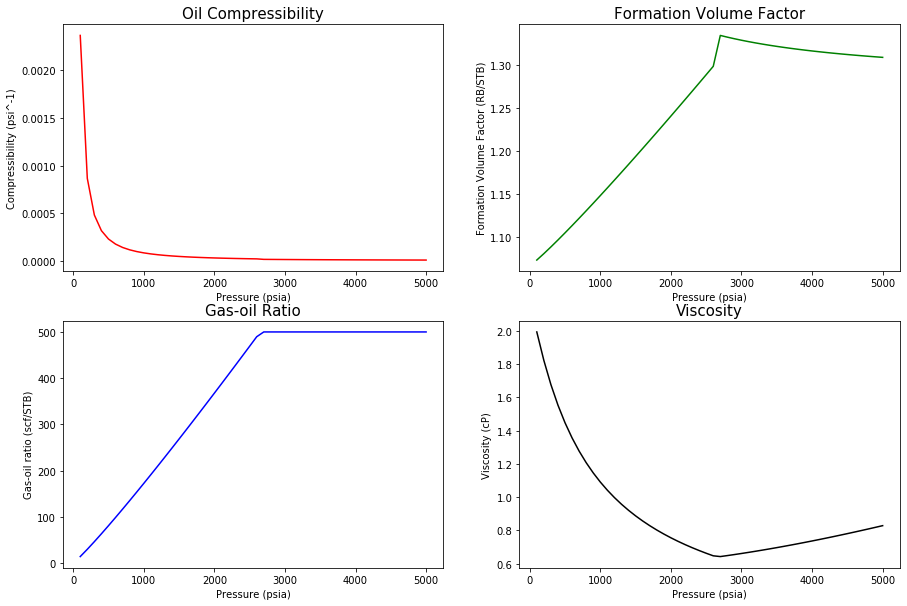

In [66]:
"Plotting Result"

fig, ax = plt.subplots(2, 2, figsize=(15,10))

ax[0, 0].plot(props[['pressure(psia)']], props[['compressibility(psi^-1)']], 'r') #row=0, col=0
ax[0, 0].set_title('Oil Compressibility', size = 15)
ax[0, 0].set_xlabel("Pressure (psia)")
ax[0, 0].set_ylabel("Compressibility (psi^-1)")
ax[1, 0].plot(props[['pressure(psia)']], props[['Gas-oil ratio(scf/STB)']], 'b') #row=1, col=0
ax[1, 0].set_title('Gas-oil Ratio', size = 15)
ax[1, 0].set_xlabel("Pressure (psia)")
ax[1, 0].set_ylabel("Gas-oil ratio (scf/STB)")
ax[0, 1].plot(props[['pressure(psia)']], props[['formation-volume-factor(RB/STB)']], 'g') #row=0, col=1
ax[0, 1].set_title('Formation Volume Factor', size = 15)
ax[0, 1].set_xlabel("Pressure (psia)")
ax[0, 1].set_ylabel("Formation Volume Factor (RB/STB)")
ax[1, 1].plot(props[['pressure(psia)']], props[['viscosity (cP)']], 'k') #row=1, col=1
ax[1, 1].set_title('Viscosity', size = 15)
ax[1, 1].set_xlabel("Pressure (psia)")
ax[1, 1].set_ylabel("Viscosity (cP)")

# Dranchuk and Abou-Kassem EOS for Z Factor Calculation

In [99]:
# T_pr, P_pr from Example 2.4 (run first, Example 2.4)

from scipy.optimize import fsolve # non-linear solver

a1 = 0.3265; a2 = -1.0700; a3 = -0.5339; a4 = 0.01569; a5 = -0.05165; a6 = 0.5475
a7 = -0.7361; a8 = 0.1844; a9 = 0.1056; a10 = 0.6134; a11 = 0.7210

def f(y):
  rho_pr, z = y
  c1 = a1 + (a2/T_pr) + (a3/(T_pr**3))+ (a4/(T_pr**4))+ (a5/(T_pr**5))
  c2 = a6 + (a7/T_pr) + (a8/(T_pr**2))
  c3 = a9*((a7/T_pr) + (a8/(T_pr**2)))
  c4 = (a10)*(1+(a11*(rho_pr**2)))*((rho_pr**2)/(T_pr**3))*(np.exp(-a11*(rho_pr**2)))

  f1 = z + (c3*(rho_pr**5)) - (c2*(rho_pr**2)) - (c1*(rho_pr**1)) - c4 - 1
  f2 = rho_pr - ((0.27 * P_pr) / (z * T_pr))
  return[f1, f2]

solve = fsolve(f, [1, 1]) # initial guess

print("Gas Pseudoreduced Density using Drancuk-Abou Kassem EOS: ",solve[0])
print("Gas compressibility factor using Drancuk-Abou Kassem EOS: ",solve[1])

Gas Pseudoreduced Density using Drancuk-Abou Kassem EOS:  0.744691155606479
Gas compressibility factor using Drancuk-Abou Kassem EOS:  0.7730732979223308
